# Giai đoạn 1: Thiết lập môi trường & Dữ liệu
Mục tiêu: Chuẩn bị thư viện và tải dữ liệu theo yêu cầu.

## 1. Cài đặt thư viện
Import các thư viện cần thiết: NumPy, Pandas, Matplotlib, Seaborn, OpenCV.

In [1]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn opencv-python tensorflow
!python -m ipykernel install --user --name=my_project_env --display-name "Python (Data Mining)"


^C
Installed kernelspec my_project_env in C:\Users\tquan\AppData\Roaming\jupyter\kernels\my_project_env


  Using cached opencv_python-4.13.0.92-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.4.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached grpcio-1.78.0-cp313-cp313-win_amd64.whl.metadata (3.9 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.13.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached ml_dtypes-0.5.4-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cac

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from keras.datasets import cifar10

# Cấu hình hiển thị matplotlib
# %matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

c:\Users\hoang\AppData\Local\Programs\Python\Python310\lib\site-packages\google\api_core\_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.6) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


## 2. Tải và kiểm tra dữ liệu
Sử dụng bộ dữ liệu CIFAR-10. Chọn ngẫu nhiên 5 hình ảnh để hiển thị.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 52s 0us/step


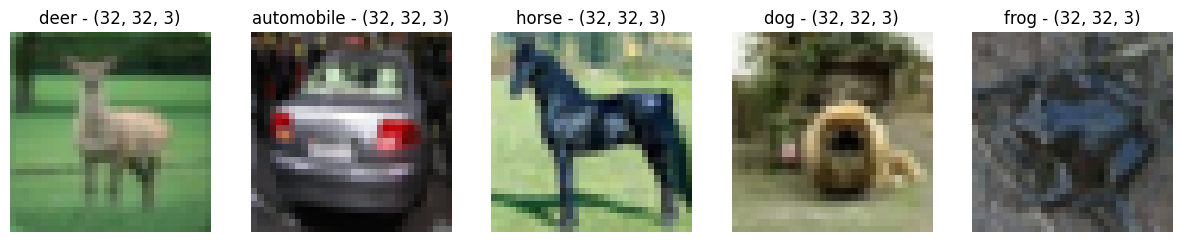

In [4]:
# Tải dữ liệu CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Nhãn của CIFAR-10
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Chọn ngẫu nhiên 5 chỉ số
indices = np.random.choice(len(x_train), 5, replace=False)
sample_images = x_train[indices]
sample_labels = y_train[indices].flatten()

# Hiển thị 5 ảnh
plt.figure(figsize=(15, 3))
for i, (img, label_idx) in enumerate(zip(sample_images, sample_labels)):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"{labels[label_idx]} - {img.shape}")
    plt.axis('off')
plt.show()

# Giai đoạn 2: Quy trình xử lý ảnh
Thực hiện Resize và Grayscale conversion.

### Bước 1: Resize & Bước 2: Grayscale
- **Resize:** Đưa về kích thước 128x128.
- **Grayscale:** Chuyển sang ảnh xám.

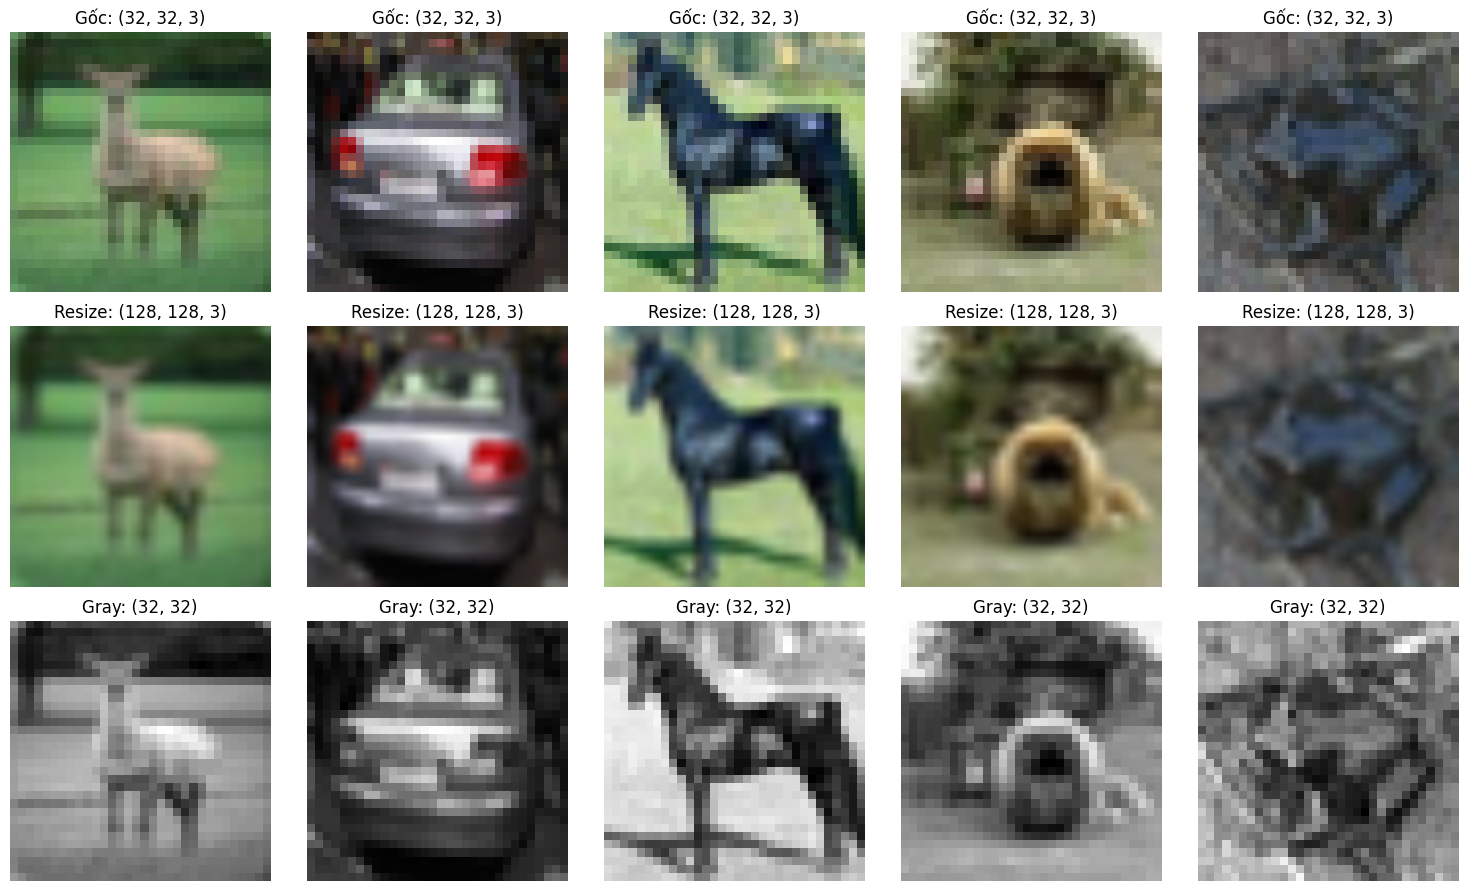

In [5]:
def resize_images(images, size=(128, 128)):
    resized = []
    for img in images:
        resized.append(cv2.resize(img, size))
    return np.array(resized)

def to_grayscale(images):
    gray = []
    for img in images:
        # Chuyển đổi RGB sang Grayscale
        # Lưu ý: OpenCV mặc định đọc ảnh là BGR nếu dùng cv2.imread,
        # nhưng keras load CIFAR-10 là RGB. cv2.cvtColor cần tham số đúng.
        gray.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    return np.array(gray)

# Thực hiện xử lý
resized_images = resize_images(sample_images)
gray_images = to_grayscale(sample_images)

# Visualize so sánh (3 hàng: Gốc, Resize, Grayscale)
plt.figure(figsize=(15, 9))
for i in range(5):
    # Ảnh gốc
    plt.subplot(3, 5, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"Gốc: {sample_images[i].shape}")
    plt.axis('off')

    # Ảnh Resize 128x128
    plt.subplot(3, 5, i+6)
    plt.imshow(resized_images[i])
    plt.title(f"Resize: {resized_images[i].shape}")
    plt.axis('off')

    # Ảnh Grayscale
    plt.subplot(3, 5, i+11)
    plt.imshow(gray_images[i], cmap='gray')
    plt.title(f"Gray: {gray_images[i].shape}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Phân tích (Analysis)
**1. Resize (128x128):**
- Lý do chọn kích thước 128x128: Đây là một kích thước trung bình, đủ lớn để giữ lại các chi tiết quan trọng của đối tượng trong ảnh CIFAR-10 (vốn rất nhỏ, chỉ 32x32) khi phóng to để xử lý hoặc làm input cho các mô hình yêu cầu kích thước lớn hơn, nhưng cũng đủ nhỏ để đảm bảo tốc độ tính toán nhanh hơn so với các kích thước lớn như 256x256 hay 512x512.

**2. Grayscale Conversion:**
- **Thông tin:** Khi chuyển sang ảnh xám, ta mất đi thông tin về màu sắc (3 kênh màu R, G, B giảm xuống còn 1 kênh cường độ sáng). Dữ liệu giảm đi 1/3.
- **Khi nào dùng ảnh xám:** 
    - Khi bài toán không phụ thuộc vào màu sắc (ví dụ: nhận diện ký tự, phát hiện biên cạnh, nhận diện khuôn mặt dựa trên hình thái).
    - Giúp giảm nhiễu màu và tăng tốc độ xử lý do khối lượng tính toán giảm đáng kể.

# Giai đoạn 3: Chuẩn hóa dữ liệu (Normalization)
Thực hiện Min-Max Scaling và Z-score Standardization.

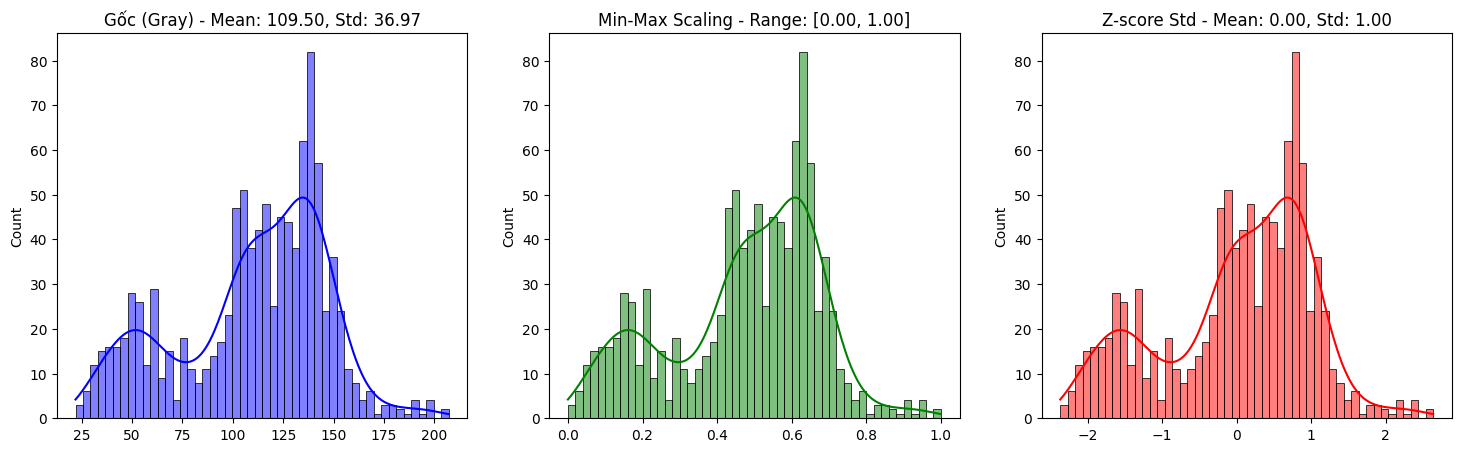

In [6]:
def min_max_scaling(image):
    # Đưa về đoạn [0, 1]
    return (image - image.min()) / (image.max() - image.min())

def z_score_standardization(image):
    # Đưa về mean=0, std=1
    return (image - image.mean()) / image.std()

# Chọn 1 ảnh mẫu để phân tích histogram
sample_img_gray = gray_images[0]

img_minmax = min_max_scaling(sample_img_gray)
img_zscore = z_score_standardization(sample_img_gray)

# Vẽ Histogram so sánh
plt.figure(figsize=(18, 5))

# Histogram ảnh gốc
plt.subplot(1, 3, 1)
sns.histplot(sample_img_gray.ravel(), kde=True, color='blue', bins=50)
plt.title(f"Gốc (Gray) - Mean: {sample_img_gray.mean():.2f}, Std: {sample_img_gray.std():.2f}")

# Histogram Min-Max
plt.subplot(1, 3, 2)
sns.histplot(img_minmax.ravel(), kde=True, color='green', bins=50)
plt.title(f"Min-Max Scaling - Range: [{img_minmax.min():.2f}, {img_minmax.max():.2f}]")

# Histogram Z-score
plt.subplot(1, 3, 3)
sns.histplot(img_zscore.ravel(), kde=True, color='red', bins=50)
plt.title(f"Z-score Std - Mean: {img_zscore.mean():.2f}, Std: {img_zscore.std():.2f}")

plt.show()

### Phân tích (Analysis)
- **Min-Max Scaling:** Trục hoành thay đổi về phạm vi $[0, 1]$. Hình dạng phân phối (distribution shape) vẫn giữ nguyên so với ảnh gốc, chỉ co giãn tỉ lệ.
- **Z-score Standardization:** Trục hoành thay đổi sao cho trung tâm (mean) nằm ở 0 và độ lệch chuẩn là 1. Hình dạng phân phối cũng giữ nguyên, nhưng giá trị bây giờ thể hiện số độ lệch chuẩn so với trung bình. Phương pháp này giúp dữ liệu ít bị ảnh hưởng bởi outlier hơn Min-Max.

# Giai đoạn 4: Dò biên (Edge Detection)
Sử dụng thuật toán Canny để trích xuất đặc trưng biên cạnh.

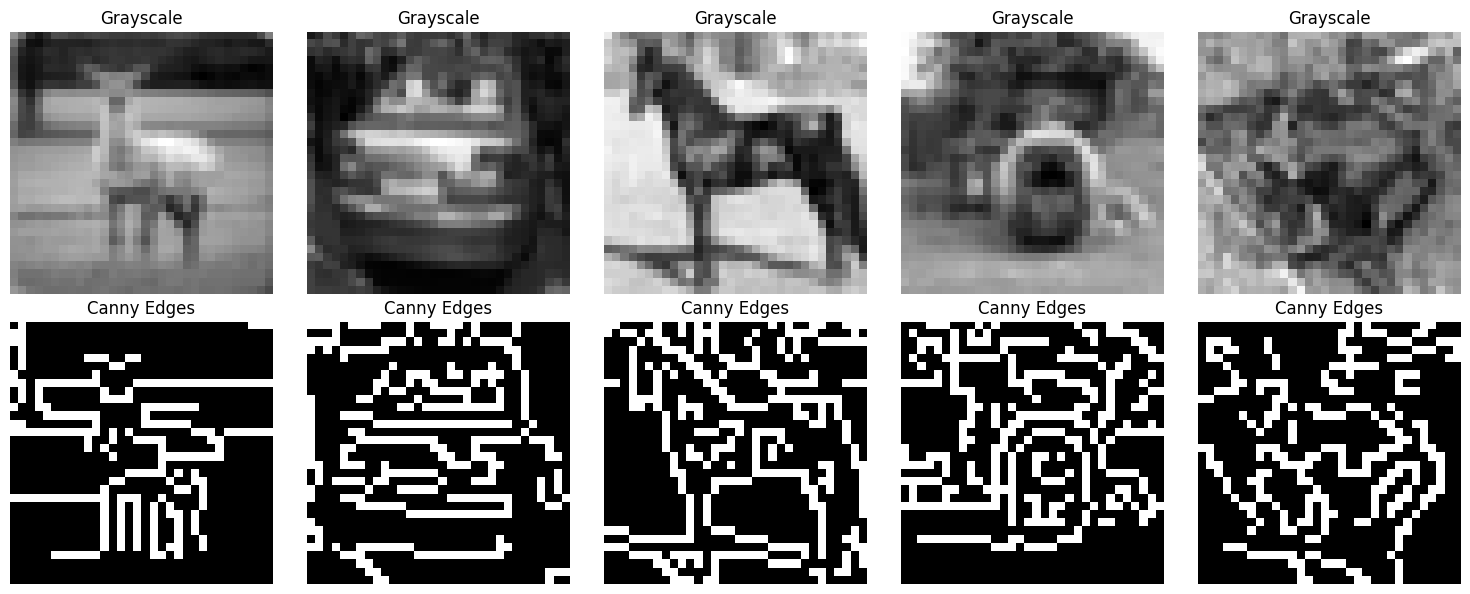

In [7]:
# Áp dụng Canny Edge Detection
edges_images = []
threshold1 = 100
threshold2 = 200

for img in gray_images:
    # Canny yêu cầu ảnh đầu vào là uint8
    # Nếu ảnh đã qua xử lý float thì cần convert lại, nhưng ở đây gray_images vẫn là uint8 từ cvtColor
    edges = cv2.Canny(img, threshold1, threshold2)
    edges_images.append(edges)

# Visualization
plt.figure(figsize=(15, 6))
for i in range(5):
    # Ảnh Grayscale
    plt.subplot(2, 5, i+1)
    plt.imshow(gray_images[i], cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')

    # Ảnh Edges
    plt.subplot(2, 5, i+6)
    plt.imshow(edges_images[i], cmap='gray')
    plt.title("Canny Edges")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Phân tích (Analysis)
- **Ý nghĩa dò biên:** Các đường biên tìm được bởi thuật toán Canny biểu diễn các sự thay đổi đột ngột về cường độ sáng trong ảnh. 
- Trong bài toán nhận diện đối tượng:
    - Giúp tách vật thể ra khỏi nền (background subtraction).
    - Cung cấp đặc trưng hình dạng (shape features) quan trọng, giúp mô hình tập trung vào cấu trúc của vật thể thay vì bị nhiễu bởi màu sắc hay ánh sáng.
    - Giảm lượng dữ liệu cần xử lý trong khi vẫn giữ lại thông tin cấu trúc quan trọng nhất.